In [2]:
!pip install pandas
import pandas as pd

df = pd.read_csv('population.csv')
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,102050.0,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,532760424.0,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,30117411.0,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,360285439.0,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,24220660.0,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0


In [3]:
highest = df['2020'].nlargest(20).tolist()
filtered_highest = df[df['2020'].isin(highest)]
filtered_highest

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
40,China,CHN,"Population, total",SP.POP.TOTL,6.670700e+08,6.603300e+08,6.657700e+08,6.823350e+08,6.983550e+08,7.151850e+08,...,1.345035e+09,1.354190e+09,1.363240e+09,1.371860e+09,1.379860e+09,1.387790e+09,1.396215e+09,1.402760e+09,1.407745e+09,1.410929e+09
61,East Asia & Pacific (excluding high income),EAP,"Population, total",SP.POP.TOTL,8.948758e+08,8.944795e+08,9.064139e+08,9.296347e+08,9.524942e+08,9.763606e+08,...,1.980940e+09,1.997885e+09,2.014779e+09,2.031186e+09,2.046830e+09,2.062232e+09,2.077971e+09,2.091680e+09,2.103705e+09,2.113821e+09
62,Early-demographic dividend,EAR,"Population, total",SP.POP.TOTL,9.800033e+08,1.003195e+09,1.027205e+09,1.051973e+09,1.077531e+09,1.103860e+09,...,2.951424e+09,2.994347e+09,3.037084e+09,3.079686e+09,3.122157e+09,3.164440e+09,3.206486e+09,3.248414e+09,3.290291e+09,3.332105e+09
63,East Asia & Pacific,EAS,"Population, total",SP.POP.TOTL,1.041674e+09,1.043657e+09,1.058120e+09,1.083884e+09,1.109291e+09,1.135760e+09,...,2.222578e+09,2.240313e+09,2.257904e+09,2.275076e+09,2.291504e+09,2.307626e+09,2.323933e+09,2.338223e+09,2.350704e+09,2.360855e+09
95,High income,HIC,"Population, total",SP.POP.TOTL,7.597836e+08,7.694994e+08,7.794653e+08,7.893589e+08,7.991598e+08,8.085966e+08,...,1.159642e+09,1.166466e+09,1.173352e+09,1.180424e+09,1.187317e+09,1.194192e+09,1.200274e+09,1.205942e+09,1.210796e+09,1.214930e+09
102,IBRD only,IBD,"Population, total",SP.POP.TOTL,1.919643e+09,1.940357e+09,1.974019e+09,2.019554e+09,2.065153e+09,2.111931e+09,...,4.471932e+09,4.518944e+09,4.566063e+09,4.612372e+09,4.657516e+09,4.701907e+09,4.746019e+09,4.787344e+09,4.826259e+09,4.862388e+09
103,IDA & IBRD total,IBT,"Population, total",SP.POP.TOTL,2.299245e+09,2.329155e+09,2.372381e+09,2.427869e+09,2.483840e+09,2.541415e+09,...,5.868806e+09,5.947406e+09,6.026674e+09,6.105863e+09,6.184735e+09,6.263736e+09,6.343293e+09,6.420905e+09,6.496952e+09,6.570992e+09
104,IDA total,IDA,"Population, total",SP.POP.TOTL,3.796021e+08,3.887977e+08,3.983617e+08,4.083157e+08,4.186865e+08,4.294836e+08,...,1.396874e+09,1.428462e+09,1.460611e+09,1.493492e+09,1.527219e+09,1.561829e+09,1.597274e+09,1.633562e+09,1.670693e+09,1.708604e+09
109,India,IND,"Population, total",SP.POP.TOTL,4.505477e+08,4.596422e+08,4.690772e+08,4.788256e+08,4.888481e+08,4.991233e+08,...,1.250288e+09,1.265780e+09,1.280842e+09,1.295601e+09,1.310152e+09,1.324517e+09,1.338677e+09,1.352642e+09,1.366418e+09,1.380004e+09
139,Lower middle income,LMC,"Population, total",SP.POP.TOTL,9.899840e+08,1.012695e+09,1.036175e+09,1.060393e+09,1.085299e+09,1.110853e+09,...,2.923660e+09,2.968244e+09,3.013187e+09,3.058249e+09,3.103569e+09,3.149023e+09,3.194518e+09,3.240032e+09,3.285417e+09,3.330653e+09


  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
  Obtaining dependency information for matplotlib!=3.6.1,>=3.3 from https://files.pythonhosted.org/packages/4f/f7/a5d8ff9e9cfcaa31851a711db9844e95685927b3034e30388cd4a15aa669/matplotlib-3.8.0-cp39-cp39-macosx_10_12_x86_64.whl.metadata
  Using cached matplotlib-3.8.0-cp39-cp39-macosx_10_12_x86_64.whl.metadata (5.8 kB)
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/16/d9/8a15ff67fc27c65939e454512955e1b240ec75cd201d82e115b3b63ef76d/contourpy-1.1.1-cp39-cp39-macosx_10_9_x86_64.whl.metadata
  Using cached contourpy-1.1.1-cp39-cp39-macosx_10_9_x86_64.whl.metadata (5.9 kB)
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/2b/b3/70c33027c4918c10ccf176014b38f8b91cb18ac018a78854543a4fc72609/cycler-0.

<Axes: xlabel='Country Name', ylabel='2020'>

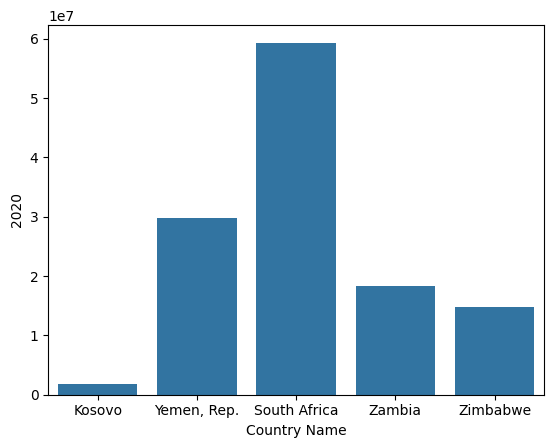

In [5]:
!pip install seaborn
import seaborn as sns
sns.barplot(x='Country Name', y='2020', data=df.tail())

In [6]:
world=df.loc[df['Country Name']=='Indonesia']
world.drop(['Country Name','Country Code','Indicator Name','Indicator Code'],axis=1,inplace=True)
world = world.T
world.head()

/var/folders/nq/594j5_s93zb26q0lb90lzh0r0000gn/T/ipykernel_14439/420872862.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world.drop(['Country Name','Country Code','Indicator Name','Indicator Code'],axis=1,inplace=True)


,106
1960,87751066.0
1961,90098396.0
1962,92518373.0
1963,95015295.0
1964,97596728.0


In [7]:
world

,106
1960,87751066.0
1961,90098396.0
1962,92518373.0
1963,95015295.0
1964,97596728.0
...,...
2016,261556386.0
2017,264650969.0
2018,267670549.0
2019,270625567.0


In [8]:
world.dropna(inplace=True)
world=world.reset_index().rename(columns={106:'population','index':'year'})
world.tail()

,year,population
56,2016,261556386.0
57,2017,264650969.0
58,2018,267670549.0
59,2019,270625567.0
60,2020,273523621.0


<Axes: xlabel='year', ylabel='population'>

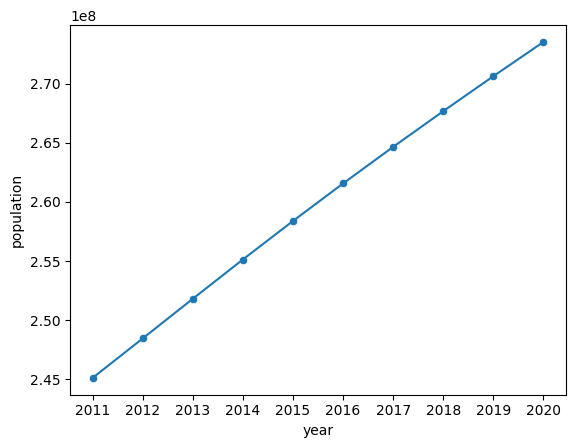

In [9]:
import seaborn as sns

sns.lineplot(x='year', y='population', data=world.tail(10))
sns.scatterplot(x='year', y='population', data=world.tail(10))

In [10]:
world['population'] = pd.to_numeric(world['population'])
world['year'] = pd.to_numeric(world['year'])

x = world['year']
y = world['population']

x

0     1960
1     1961
2     1962
3     1963
4     1964
      ... 
56    2016
57    2017
58    2018
59    2019
60    2020
Name: year, Length: 61, dtype: int64

In [13]:
# !pip install scikit-learn


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# convert to 2D array
X_train = X_train.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

X_train

array([[2013],
       [1997],
       [2006],
       [1990],
       [1991],
       [2016],
       [1984],
       [1986],
       [1971],
       [1977],
       [1982],
       [2009],
       [2005],
       [1992],
       [1987],
       [2008],
       [2001],
       [1993],
       [1978],
       [1998],
       [1966],
       [1980],
       [1981],
       [1975],
       [1994],
       [1974],
       [2017],
       [1973],
       [2003],
       [1968],
       [2007],
       [2020],
       [1970],
       [1976],
       [1988],
       [1969],
       [2004],
       [1963],
       [1962],
       [2011],
       [1983],
       [1967],
       [1985],
       [2002],
       [2018],
       [1972],
       [2012],
       [1999]])

In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred


array([[2.58627806e+08],
       [2.55460737e+08],
       [2.71296084e+08],
       [1.76284001e+08],
       [2.11121765e+08],
       [8.76060569e+07],
       [1.44613307e+08],
       [1.00274335e+08],
       [9.71072652e+07],
       [2.42792459e+08],
       [8.44389875e+07],
       [1.95286418e+08],
       [1.98453487e+08]])

<Axes: title={'center': 'True vs Predicted '}, xlabel='Year', ylabel='Population'>

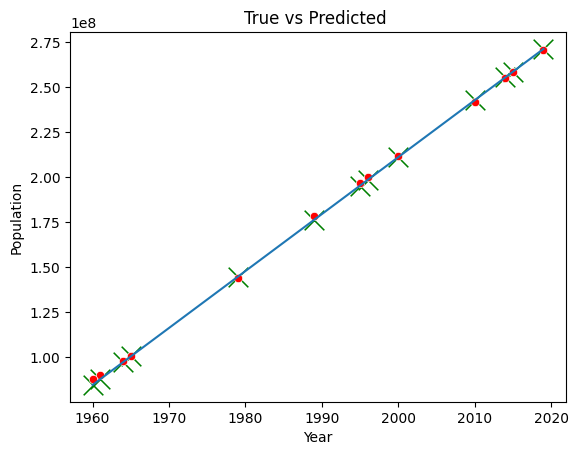

In [15]:
import matplotlib.pyplot as plt

plt.xlabel("Year")
plt.ylabel("Population")
plt.title("True vs Predicted ")
sns.lineplot(x=X_test.reshape(-1), y=y_pred.reshape(-1))
sns.scatterplot(x=X_test.reshape(-1), y=y_pred.reshape(-1), marker="x", color="green", s = 200)
sns.scatterplot(x=X_test.reshape(-1), y=y_test.reshape(-1), color="red")

In [16]:
test_data = model.predict([[2045]])
test_data

array([[3.53639889e+08]])

In [17]:
year_input = int(input("Year : "))
predict_input = model.predict([[year_input]])
print(f"World Population Prediction in {year_input} is {int(predict_input[0][0])}")

World Population Prediction in 2030 is 306133847


In [18]:
year_input = int(input("Year ?  "))
year = 2021
years = []
populations = []
for i in range(year_input):
    years.append(year + i)
    populations.append(model.predict([[year + i]])[0][0])

data_predictions = pd.DataFrame({
    'year' : years,
    'population' : populations,
})
data_predictions


,year,population
0,2021,2.776302e+08
1,2022,2.807973e+08
2,2023,2.839644e+08
3,2024,2.871314e+08
4,2025,2.902985e+08
5,2026,2.934656e+08
6,2027,2.966326e+08
7,2028,2.997997e+08
8,2029,3.029668e+08
9,2030,3.061338e+08


Text(0.5, 1.0, 'Predictions')

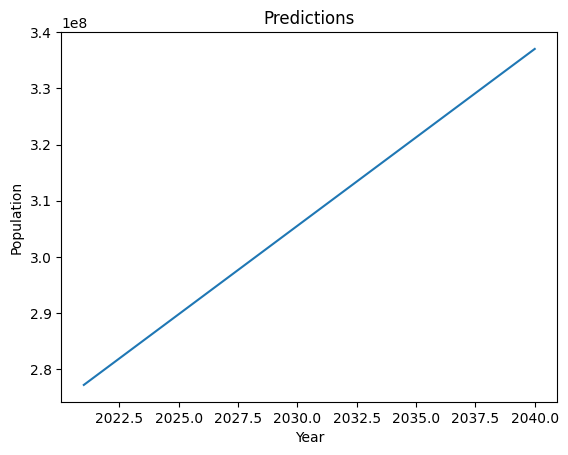

In [ ]:
sns.lineplot(x=data_predictions['year'], y=data_predictions['population'])
plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Predictions")